In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import uuid

In [2]:
pwd

'C:\\Users\\C Desktop\\Documents\\Generation Data Engineer Course\\projectnicsquared'

In [3]:
df = pd.read_csv('2020-10-01.csv', names=['Datetime', 'Location', 'Full Name', 'Order', 'Payment Type', 'Total Cost', 'Payment Details'])
df

,Datetime,Location,Full Name,Order,Payment Type,Total Cost,Payment Details
0,2020-10-01 09:00:00,Isle of Wight,John Whitmire,",Mocha,2.3,,Speciality Tea - Fruit,1.3,,Flavou...",CARD,10.90,"americanexpress,379663269694145"
1,2020-10-01 09:01:00,Isle of Wight,Sarah Perea,"Large,Americano,2.25,Regular,Americano,1.95,,F...",CASH,6.95,None
2,2020-10-01 09:02:00,Isle of Wight,Patrick Young,",Smoothies - Carrot Kick,2.0,Large,Flavoured l...",CARD,6.15,"visa13,4823964727912"
3,2020-10-01 09:03:00,Isle of Wight,Heather Gonzalez,",Flavoured iced latte - Vanilla,2.75,Regular,L...",CASH,12.40,None
4,2020-10-01 09:04:00,Isle of Wight,Michael Orser,"Large,Flavoured hot chocolate - Caramel,2.9,,S...",CARD,10.10,"mastercard,5133682835833157"
...,...,...,...,...,...,...,...
475,2020-10-01 16:55:00,Isle of Wight,Charles Evans,"Regular,Cappuccino,2.15",CASH,2.15,None
476,2020-10-01 16:56:00,Isle of Wight,Dawn Tierney,"Large,Latte,2.45,Large,Flavoured latte - Vanil...",CARD,5.30,"americanexpress,368612251452833"
477,2020-10-01 16:57:00,Isle of Wight,Roberta Huckaby,",Speciality Tea - Darjeeling,1.3,,Speciality T...",CARD,6.65,"discover,6011169796556113"
478,2020-10-01 16:58:00,Isle of Wight,Donald Allen,",Speciality Tea - Green,1.3,,Flat white,2.15,,...",CASH,4.75,None


In [4]:
df.index = [uuid.uuid4() for x in range(len(df))]

In [5]:
df['Total Cost']

8df84f29-5159-41a7-8be1-823606b47e63    10.90
0bf3f2dc-805a-4318-947e-b39ff476c1ec     6.95
cfe1da19-f34c-442a-9c7f-1f0ac0b4325f     6.15
19fbfc1c-f395-4417-a2ed-43926ad0a16c    12.40
b9396f2d-6449-4456-85f6-18f65959233e    10.10
                                        ...  
40bb6309-31e5-47fc-92cf-84e80dc1bc12     2.15
8c345098-d404-403f-a783-d0ba4b17489d     5.30
890dc76a-d0e2-4edd-9459-d8506a6a5d54     6.65
43bc3c6c-c306-494e-92fa-a3bb10811071     4.75
fd74ef62-de41-4b4e-a0c6-e208cb5faeca     4.55
Name: Total Cost, Length: 480, dtype: float64

In [6]:
time_cost = df[['Datetime', 'Total Cost']]
time_cost

,Datetime,Total Cost
8df84f29-5159-41a7-8be1-823606b47e63,2020-10-01 09:00:00,10.90
0bf3f2dc-805a-4318-947e-b39ff476c1ec,2020-10-01 09:01:00,6.95
cfe1da19-f34c-442a-9c7f-1f0ac0b4325f,2020-10-01 09:02:00,6.15
19fbfc1c-f395-4417-a2ed-43926ad0a16c,2020-10-01 09:03:00,12.40
b9396f2d-6449-4456-85f6-18f65959233e,2020-10-01 09:04:00,10.10
...,...,...
40bb6309-31e5-47fc-92cf-84e80dc1bc12,2020-10-01 16:55:00,2.15
8c345098-d404-403f-a783-d0ba4b17489d,2020-10-01 16:56:00,5.30
890dc76a-d0e2-4edd-9459-d8506a6a5d54,2020-10-01 16:57:00,6.65
43bc3c6c-c306-494e-92fa-a3bb10811071,2020-10-01 16:58:00,4.75


<AxesSubplot:title={'center':'Cumulative day revenue (2020-10-01)'}, xlabel='Time', ylabel='Total Revenue'>

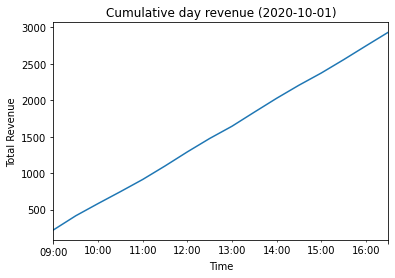

In [7]:
time_cost.index = pd.to_datetime(time_cost['Datetime'])
series = pd.Series(time_cost['Total Cost'], index=time_cost.index)
resampled_series = series.resample('30T').sum()
resampled_series.cumsum().plot(title='Cumulative day revenue (2020-10-01)', xlabel='Time', ylabel='Total Revenue')

In [8]:
products_sold_daily = pd.read_csv('products_sold.csv', names=['Size', 'Drink', 'Total Sold'])

In [9]:
products_sold_daily

,Size,Drink,Total Sold
0,NaN,Mocha,35
1,NaN,Speciality Tea - Fruit,29
2,NaN,Flavoured Iced Latte - Vanilla,28
3,NaN,Frappes - Chocolate Cookie,41
4,Large,Filter Coffee,24
5,Large,Americano,37
6,Regular,Americano,25
7,NaN,Smoothies - Glowing Greens,31


<AxesSubplot:title={'center':'Total drinks sold'}, ylabel='Drink'>

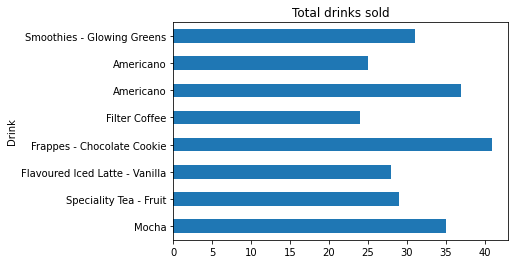

In [10]:
products_sold_daily.plot(x='Drink', kind='barh', stacked=True, title='Total drinks sold', legend=False)

In [11]:
products_sold_daily.index = products_sold_daily['Drink']

In [12]:
products_sold_daily

,Size,Drink,Total Sold
Drink,,,
Mocha,NaN,Mocha,35
Speciality Tea - Fruit,NaN,Speciality Tea - Fruit,29
Flavoured Iced Latte - Vanilla,NaN,Flavoured Iced Latte - Vanilla,28
Frappes - Chocolate Cookie,NaN,Frappes - Chocolate Cookie,41
Filter Coffee,Large,Filter Coffee,24
Americano,Large,Americano,37
Americano,Regular,Americano,25
Smoothies - Glowing Greens,NaN,Smoothies - Glowing Greens,31


<AxesSubplot:title={'center':'Total drinks sold'}, ylabel='Drink'>

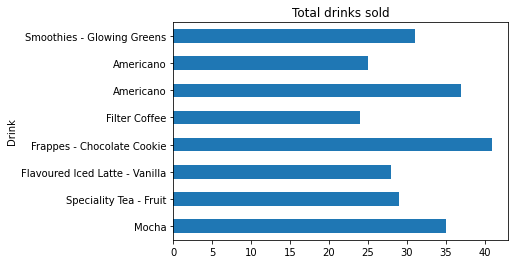

In [13]:
products_sold_daily.plot(x='Drink',kind='barh', stacked=True, title='Total drinks sold', legend=False)

In [36]:
stacked_drinks_sold = pd.read_csv('products_sold2.csv', names=['Drink', 'Regular', 'Large'])

In [37]:
stacked_drinks_sold

,Drink,Regular,Large
0,Mocha,35,NaN
1,Speciality Tea - Fruit,29,NaN
2,Flavoured Iced Latte - Vanilla,28,NaN
3,Frappes - Chocolate Cookie,41,NaN
4,Filter Coffee,12,24.0
5,Americano,25,37.0
6,Smoothies - Glowing Greens,31,NaN


<AxesSubplot:title={'center':'Total drinks sold'}>

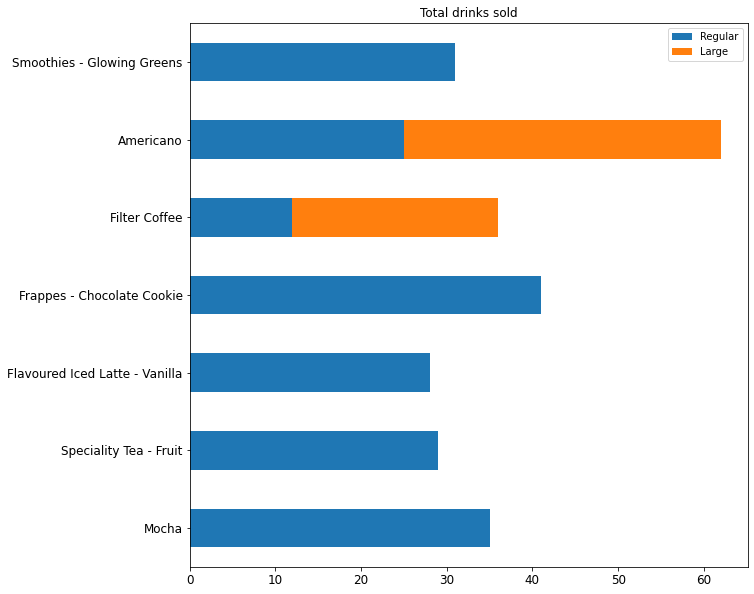

In [43]:
stacked_drinks_sold.plot(x='Drink', kind='barh', xlabel='', ylabel='Total Sold', figsize=(10,10), fontsize=12, stacked=True, title='Total drinks sold', legend=True)